In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [ ]:
def F(g,x):
  return g*x*(1-x)

In [ ]:
def a1(Xo):
  arr = np.linspace(0,4,1000)
  for j in arr:
    x = Xo
    for i in range (1,1000):
      x = F(j,x)
      if(i >= 900):
        plt.plot(j,x,",k",alpha = .25)
  plt.show()


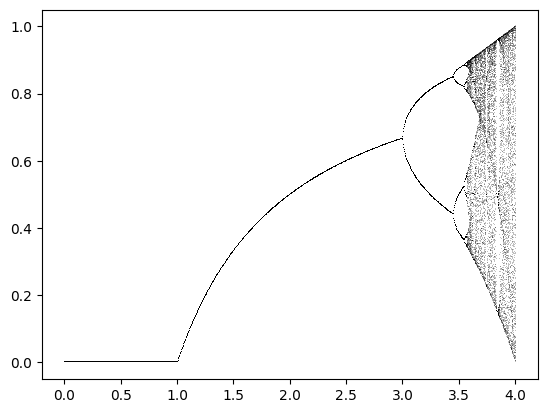

In [ ]:
a1(.001)

In [ ]:
def a2():
  critical = 0
  two = 0
  four = 0
  value = {}
  arr = np.linspace(1,4,3000)
  for j in arr:
    value[j] = []
    x = .001
    for i in range (1,1000):
      x = F(j,x)
      if(i >= 900):
        value[j].append(round(x,3))
    value[j] = [*set(value[j])]

  for i in value:
    if(len(value[i]) >  25):
      print("critical point",i)
      critical = i
      break

  for i in value:
    if(len(value[i])  == 4):
      print("period-4",i)
      four = i
      break
  for i in value:
    if(len(value[i])  == 2):
      print("period-2",i)
      two = i
      break

  X = [.05]
  x = .05
  for i in range(50):
    x = F(critical,x)
    X.append(x)
  plt.plot(X)
  plt.title("X vs N")

  print("Feigenbaum number", (two-1)/(four-two))

critical point 3.568856285428476
period-4 3.4498166055351787
period-2 2.9956652217405804
Feigenbaum number 4.394273127753303


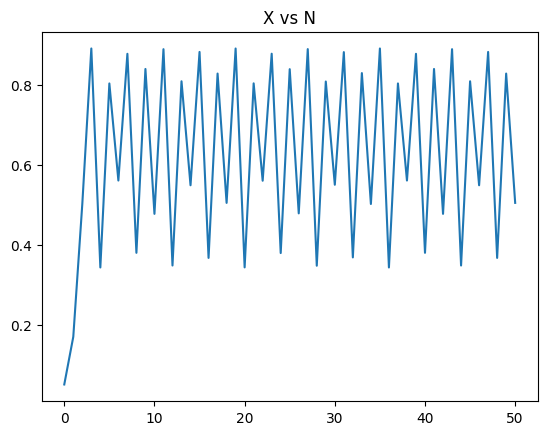

In [ ]:
a2()

In [ ]:
#This was taken from GeeksforGeeks
def most_frequent(List):
    counter = 0
    num = List[0]

    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i

    return num
# up till here

def stepbystep(g):
  X = [.05]
  Y = [.05]
  x = .05
  for i in range(20):
    X.append(X[len(X)-1])
    x = F(g,x)
    Y.append(x)
    X.append(x)
    Y.append(x)
  plt.plot(X,Y)
  for i in range(40):
    Y[i] = round(Y[i],2)
  print("Stable Fixpoints" ,most_frequent(Y))


In [ ]:
def b(mew):
  x = np.linspace(0,1,100)
  y = F(mew,x)
  y2 = x
  plt.plot(x,y2)
  plt.plot(x,y)
  stepbystep(mew)
  plt.xlabel("Xn")
  plt.ylabel("Xn+1")
  plt.show()

Period-1
Stable Fixpoints 0.03


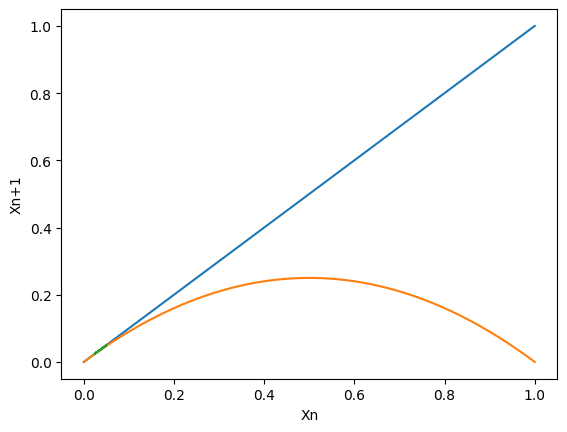

Period-4
Stable Fixpoints 0.86


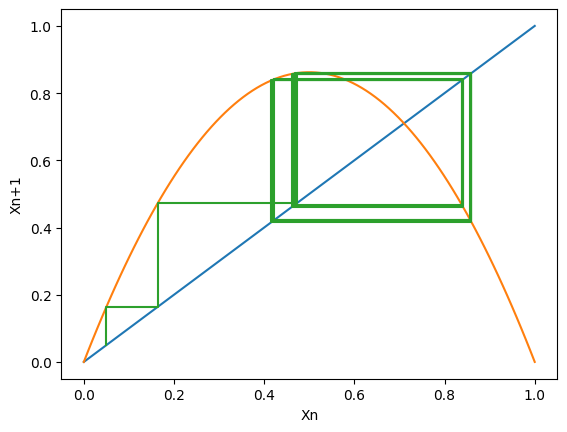

Critical Value
Stable Fixpoints 0.89


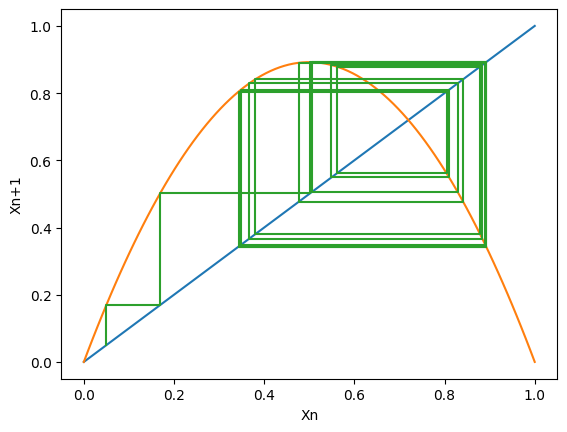

In [ ]:
print("Period-1")
b(1)
print("Period-4")
b(3.449)
print("Critical Value")
b(3.569)

In [ ]:
def g1(x):
  return F(1,x)

In [ ]:
def g4(x):
  return F(4,F(4,(F(4,F(4,x)))))

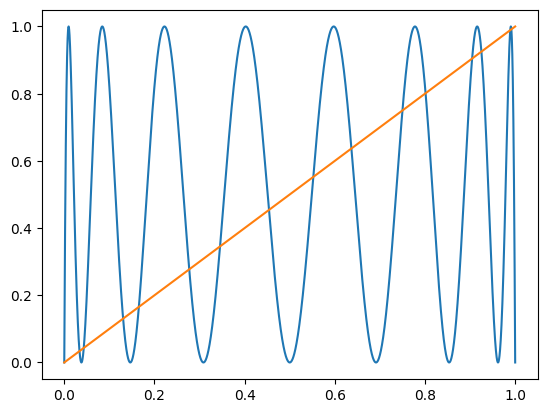

0.0


In [ ]:
def c4():
  x = np.linspace(0,1,100000)
  y = g4(x)
  plt.plot(x,y)
  y2 = x
  plt.plot(x,y2)
  plt.show()
  for i in range(len(y)):
      if(x[i] == y[i]):
        print(x[i])
c4()

The stable fixpoints on this graph are at approximately (.25,.25) and (.9,.9) as the slopes are very close to 0 and the intersection is near the rounding out of the curve

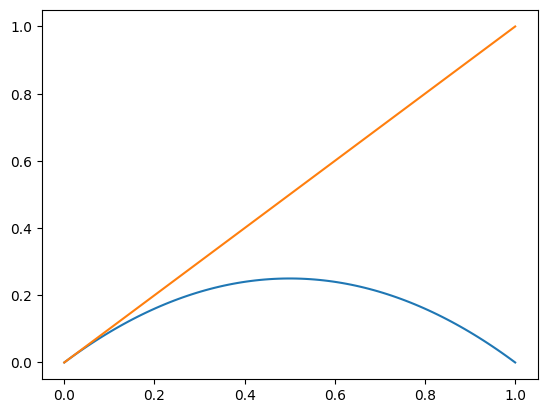

0.0
0.22222222222222224
0.0


In [ ]:
def c1():
  x = np.linspace(0,1,100)
  y = g1(x)
  plt.plot(x,y)
  y2 = x
  plt.plot(x,y2)
  plt.show()
  for i in y:
    for j in x:
      if(i == j):
        print(i)
c1()

This has one stable fixpoint at .22

In [ ]:
def d():

  def lyapunov_exponent(x0, mu, num_iterations, num_trials):
    """
    Calculates the Lyapunov exponent for the logistic map with
    parameter mu given an initial condition x0.

    Args:
    x0 (float): Initial condition.
    mu (float): Parameter of the logistic map.
    num_iterations (int): Number of iterations to perform.
    num_trials (int): Number of trials to average over.

    Returns:
    float: The Lyapunov exponent.
    """
    # Define the logistic map
    def logistic_map(x, mu):
        return mu * x * (1 - x)

    # Initialize the Lyapunov exponent
    lyap = 0.0

    # Perform num_trials trials
    for n in range(num_trials):
        x = x0 + (2 * np.random.rand() - 1) * 1e-4
        # Initialize the tangent vector
        for i in range(num_iterations):
            x = F(mu, x)
            v = (1-2*x)*mu
            xn = x + 1e-4*v
            # Update the Lyapunov exponent
            lyap += np.log(abs(v))
            x = xn

    # Average the Lyapunov exponent over num_trials trials
    lyap = lyap / (num_trials * num_iterations)

    return lyap


  mu_values = [3.3, 3.8]
  num_iterations = 1000
  num_trials = 100

  print(f"Lyaponov exponent for 3.3 is {lyapunov_exponent(0.5,mu_values[0],num_iterations, num_trials)}")
  print(f"Lyaponov exponent for 3.8 is {lyapunov_exponent(0.5,mu_values[1],num_iterations, num_trials)}")

In [ ]:
d()

Lyaponov exponent for 3.3 is -0.6273721794015453
Lyaponov exponent for 3.8 is 0.44091402417576503
